In [1]:
import numpy as np
import pandas as pd

In [44]:
df = pd.read_csv('S:\Conestoga\Learning_Subject\Foundation_of_ML\Project\data\data1/amazon.csv')
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [45]:
df.shape

(1465, 16)

In [46]:
# finding unique values of customer_id
df['user_id'].nunique()

1194

We can see that from 1465 records 1194 are unique, meaning that there are 1194 customers whom we can target in order to give them product recommendation.

In [47]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [48]:
# Dropping the missing values
df = df.dropna()

In [49]:
print(df["product_id"].nunique())
print(df["user_id"].nunique())

1349
1192


exracting meaningful features for computation of recommendation system!

In [50]:
main_feature4m_df = df[['user_id', 'product_id', 'product_name', 'about_product', 'category', 'rating', 'rating_count', 'discounted_price', 'actual_price', 'review_title', 'review_content']]

In [51]:
main_feature4m_df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [52]:
# removing the rows with rating | error terms
main_feature4m_df.shape

(1463, 11)

In [53]:
# cleaning the ratings column which has unwanted values "|" as rating.
main_feature4m_df = main_feature4m_df[main_feature4m_df['rating'] != '|']
main_feature4m_df.shape


(1462, 11)

In [54]:
main_feature4m_df.sample(5)

,user_id,product_id,product_name,about_product,category,rating,rating_count,discounted_price,actual_price,review_title,review_content
1050,"AHNVMNUO3GZIOGQKKAGSPTXY5VEQ,AFKDML4DUIIFJPCMT...",B09KNMLH4Y,"R B Nova Lint/Fabric Shaver for Cloths, Lint R...",Quick and efficient Switch to turn it on and g...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",4.1,257,₹398,"₹1,999","The Best Purchase,Very useful product,Good pro...",I've been an Amazon customer since 2014/15. Th...
711,"AFGPLYW6L6FYUGQDND7QGCRL2H2Q,AE3W6H2PP2KKMVEDI...",B06XSK3XL6,boAt Dual Port Rapid Car Charger (Qualcomm Cer...,Charges compatible devices up to 4 times faste...,Electronics|Mobiles&Accessories|MobileAccessor...,4.3,"38,221",₹571,₹999,"Good product,Value for money,Car charger,Good ...","Still using it , have ordered long time back, ..."
106,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JGDB5M1,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...,"[High Compatibility] : Phone X/XsMax/Xr ,Phone...",Computers&Accessories|Accessories&Peripherals|...,4.2,"24,269",₹449,"₹1,299","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1135,"AHVLMPOZX552F4S4UIO5DEVGXBAQ,AGSFXC44XWRFJ4D5N...",B09NTHQRW3,"InstaCuppa Portable Blender for Smoothie, Milk...",Blends Fast and Quick: Our personal blender is...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"1,034","₹1,999","₹2,499","Great for smoothies and shakes,Very good produ...",I have been using this for about six months no...
405,"AHPK4PXDZS4FBECPMPFQOZRLDPAA,AFDZPGN3IBUCVS4QG...",B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,For any product related queries contact us at:...,"Electronics|Headphones,Earbuds&Accessories|Hea...",4.0,"4,390","₹4,790","₹15,990","Little above average Earbuds,Buds i love,Uniqu...",The earphones have good clear sound quality. I...


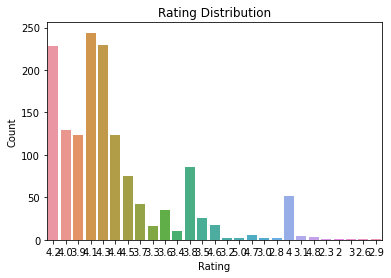

In [13]:
# plotting the ratings distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=main_feature4m_df, x='rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [55]:
# converting the column to appropriate data type from object
main_feature4m_df['rating'] = main_feature4m_df['rating'].astype(float)
main_feature4m_df['rating_count'] = main_feature4m_df['rating_count'].str.replace(",",'')  # removing , from the numbers
main_feature4m_df['rating_count'] = main_feature4m_df['rating_count'].astype('float64')  
main_feature4m_df['discounted_price'] = main_feature4m_df['discounted_price'].str.replace("₹",'')
main_feature4m_df['discounted_price'] = main_feature4m_df['discounted_price'].str.replace(",",'')
main_feature4m_df['discounted_price'] = main_feature4m_df['discounted_price'].astype('float64')
main_feature4m_df['actual_price'] = main_feature4m_df['actual_price'].str.replace("₹",'')
main_feature4m_df['actual_price'] = main_feature4m_df['actual_price'].str.replace(",",'')
main_feature4m_df['actual_price'] = main_feature4m_df['actual_price'].astype('float64')
main_feature4m_df['user_id'] = main_feature4m_df['user_id'].astype(str)
main_feature4m_df['product_id'] = main_feature4m_df['product_id'].astype(str)
main_feature4m_df['category'] = main_feature4m_df['category'].astype(str)
main_feature4m_df['product_name'] = main_feature4m_df['product_name'].astype(str)
main_feature4m_df['about_product'] = main_feature4m_df['about_product'].astype(str)
main_feature4m_df['review_title'] = main_feature4m_df['review_title'].astype(str)
main_feature4m_df['review_content'] = main_feature4m_df['review_content'].astype(str)

main_feature4m_df.dtypes

user_id              object
product_id           object
product_name         object
about_product        object
category             object
rating              float64
rating_count        float64
discounted_price    float64
actual_price        float64
review_title         object
review_content       object
dtype: object

In [56]:
# checking category 
main_feature4m_df['category'].head(3)

0    Computers&Accessories|Accessories&Peripherals|...
1    Computers&Accessories|Accessories&Peripherals|...
2    Computers&Accessories|Accessories&Peripherals|...
Name: category, dtype: object

In [57]:
nw_cat = main_feature4m_df['category'].str.split('|', expand=True)
nw_cat

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [58]:
# adding the new columns to the main dataframe
nw_cat['category_1'] = nw_cat[0]
nw_cat['category_2'] = nw_cat[1]
nw_cat['category_3'] = nw_cat[2]

In [59]:
nw_cat.head(3)

,0,1,2,3,4,5,6,category_1,category_2,category_3
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None,Computers&Accessories,Accessories&Peripherals,Cables&Accessories


From this i only use 1 two columns as it has 0 missing values compared to other subcatogry.

In [60]:
main_feature4m_df.drop('category', axis=1, inplace=True)
main_feature4m_df['category_1'] = nw_cat['category_1']
main_feature4m_df['category_2'] = nw_cat['category_2']

In [61]:
main_feature4m_df["category_1"].value_counts()

Electronics              526
Computers&Accessories    451
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: category_1, dtype: int64

In [62]:
main_feature4m_df["category_2"].value_counts()

Accessories&Peripherals                    379
Kitchen&HomeAppliances                     307
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Microphones  

In [63]:
main_feature4m_df['category_1'] = main_feature4m_df['category_1'].str.replace('&', 'and')
main_feature4m_df['category_1'] = main_feature4m_df['category_1'].str.replace('OfficeProducts', 'Office Products')
main_feature4m_df['category_1'] = main_feature4m_df['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
main_feature4m_df['category_1'] = main_feature4m_df['category_1'].str.replace('HomeImprovement', 'Home Improvement')

In [64]:
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('&', 'and')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace(',', ', ')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeAppliances', 'Home Appliances')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('AirQuality', 'Air Quality')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('ExternalDevices', 'External Devices')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('DataStorage', 'Data Storage')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeStorage', 'Home Storage')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeAudio', 'Home Audio')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('CraftMaterials', 'Craft Materials')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('PowerAccessories', 'Power Accessories')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('CarAccessories', 'Car Accessories')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeTheater', 'Home Theater')

In [65]:
main_feature4m_df.head()

,user_id,product_id,product_name,about_product,rating,rating_count,discounted_price,actual_price,review_title,review_content,category_1,category_2
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,High Compatibility : Compatible With iPhone 12...,4.2,24269.0,399.0,1099.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,ComputersandAccessories,AccessoriesandPeripherals
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"Compatible with all Type C enabled devices, be...",4.0,43994.0,199.0,349.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,ComputersandAccessories,AccessoriesandPeripherals
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,【 Fast Charger& Data Sync】-With built-in safet...,3.9,7928.0,199.0,1899.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",ComputersandAccessories,AccessoriesandPeripherals
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,The boAt Deuce USB 300 2 in 1 cable is compati...,4.2,94363.0,329.0,699.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",ComputersandAccessories,AccessoriesandPeripherals
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,4.2,16905.0,154.0,399.0,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",ComputersandAccessories,AccessoriesandPeripherals


In [66]:
main_feature4m_df.shape

(1462, 12)

In [67]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
# cleaning the text data
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

main_feature4m_df['product_name'] = main_feature4m_df['product_name'].apply(clean_text)
main_feature4m_df['about_product'] = main_feature4m_df['about_product'].apply(clean_text)
main_feature4m_df['review_title'] = main_feature4m_df['review_title'].apply(clean_text)
main_feature4m_df['review_content'] = main_feature4m_df['review_content'].apply(clean_text)

main_feature4m_df.head(3)

,user_id,product_id,product_name,about_product,rating,rating_count,discounted_price,actual_price,review_title,review_content,category_1,category_2
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,high compatibility compatible with iphone 12 ...,4.2,24269.0,399.0,1099.0,satisfiedcharging is really fastvalue for mone...,looks durable charging is fine toono complains...,ComputersandAccessories,AccessoriesandPeripherals
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,ambrane unbreakable 60w 3a fast charging 15m ...,compatible with all type c enabled devices be ...,4.0,43994.0,199.0,349.0,a good braided cable for your type c devicegoo...,i ordered this cable to connect my phone to an...,ComputersandAccessories,AccessoriesandPeripherals
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,sounce fast phone charging cable data sync us...,fast charger data syncwith builtin safety pro...,3.9,7928.0,199.0,1899.0,good speed for earlier versionsgood productwor...,not quite durable and sturdyhttpsmmediaamazonc...,ComputersandAccessories,AccessoriesandPeripherals


In [69]:
# saving the cleaned data to a new csv file
main_feature4m_df.to_csv('S:\Conestoga\Learning_Subject\Foundation_of_ML\Project\data\data1/amazon_cleaned.csv', index=False)

In [28]:
max_text_len = 5000  # Adjust based on text length
tokenizer = Tokenizer(num_words=10000)  # Hyperparameter: number of words in vocabulary
tokenizer.fit_on_texts(main_feature4m_df[["product_name", "about_product", "review_title", "review_content"]])  # Fit tokenizer on text data

In [29]:
product_name_sequences = tokenizer.texts_to_sequences(main_feature4m_df["product_name"])
product_name_sequences = pad_sequences(product_name_sequences, maxlen=max_text_len)

about_product_sequences = tokenizer.texts_to_sequences(main_feature4m_df["about_product"])
about_product_sequences = pad_sequences(about_product_sequences, maxlen=max_text_len)

review_title_sequences = tokenizer.texts_to_sequences(main_feature4m_df["review_title"])
review_title_sequences = pad_sequences(review_title_sequences, maxlen=max_text_len)

review_content_sequences = tokenizer.texts_to_sequences(main_feature4m_df["review_content"])
review_content_sequences = pad_sequences(review_content_sequences, maxlen=max_text_len)

## Making Deep Learning Model:

In [30]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders for each categorical feature
label_encoder_category1 = LabelEncoder()
label_encoder_category2 = LabelEncoder()

# Fit the encoders on the unique categories
label_encoder_category1.fit(main_feature4m_df["category_1"].unique())
label_encoder_category2.fit(main_feature4m_df["category_2"].unique())

# Encode the categorical features in your DataFrame
main_feature4m_df["category_1_encoded"] = label_encoder_category1.transform(
    main_feature4m_df["category_1"]
)
main_feature4m_df["category_2_encoded"] = label_encoder_category2.transform(
    main_feature4m_df["category_2"]
)

# Use the encoded features for further processing in your model
category1_embedding = main_feature4m_df["category_1_encoded"].values
category2_embedding = main_feature4m_df["category_2_encoded"].values

In [31]:
# Numerical Features:
# Normalize the numerical features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = main_feature4m_df[["rating", "rating_count", "discounted_price", "actual_price"]]
numerical_features = scaler.fit_transform(numerical_features)

In [32]:
# model building
# define the model architecture

# Define the embedding size
embedding_size = 16

# Define the input layers
product_name_input = keras.Input(shape=(max_text_len,), name="product_name")
about_product_input = keras.Input(shape=(max_text_len,), name="about_product")
review_title_input = keras.Input(shape=(max_text_len,), name="review_title")
review_content_input = keras.Input(shape=(max_text_len,), name="review_content")
category1_input = keras.Input(shape=(1,), name="category1")
category2_input = keras.Input(shape=(1,), name="category2")
numerical_input = keras.Input(shape=(4,), name="numerical")

# Define the embedding layers
product_name_features = Embedding(input_dim=10000, output_dim=embedding_size)(product_name_input)
about_product_features = Embedding(input_dim=10000, output_dim=embedding_size)(about_product_input)
review_title_features = Embedding(input_dim=10000, output_dim=embedding_size)(review_title_input)
review_content_features = Embedding(input_dim=10000, output_dim=embedding_size)(review_content_input)
category1_features = Embedding(input_dim=main_feature4m_df["category_1_encoded"].nunique(), output_dim=embedding_size)(category1_input)
category2_features = Embedding(input_dim=main_feature4m_df["category_2_encoded"].nunique(), output_dim=embedding_size)(category2_input)

# Define the pooling layer
product_name_features = GlobalAveragePooling1D()(product_name_features)
about_product_features = GlobalAveragePooling1D()(about_product_features)
review_title_features = GlobalAveragePooling1D()(review_title_features)
review_content_features = GlobalAveragePooling1D()(review_content_features)
category1_features = GlobalAveragePooling1D()(category1_features)
category2_features = GlobalAveragePooling1D()(category2_features)

# Define the output layer
output = concatenate(
    [
        product_name_features,
        about_product_features,
        review_title_features,
        review_content_features,
        category1_features,
        category2_features,
        numerical_input,
    ]
)
output = Dense(64, activation="relu")(output)
output = Dense(5, activation="linear")(output)  # finding top 5 recommendations

# Define the model
model = keras.Model(
    inputs=[
        product_name_input,
        about_product_input,
        review_title_input,
        review_content_input,
        category1_input,
        category2_input,
        numerical_input,
    ],
    outputs=[output],
)

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 product_name (InputLayer)      [(None, 5000)]       0           []                               
                                                                                                  
 about_product (InputLayer)     [(None, 5000)]       0           []                               
                                                                                                  
 review_title (InputLayer)      [(None, 5000)]       0           []                               
                                                                                                  
 review_content (InputLayer)    [(None, 5000)]       0           []                               
                                                                                              

In [33]:
# history

history = model.fit(
    {
        "product_name": product_name_sequences,
        "about_product": about_product_sequences,
        "review_title": review_title_sequences,
        "review_content": review_content_sequences,
        "category1": category1_embedding,
        "category2": category2_embedding,
        "numerical": numerical_features,
    },
    main_feature4m_df["rating"],
    epochs=10,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/10
37/37 [==============================] - 2s 43ms/step - loss: 13.9502 - val_loss: 9.2712
Epoch 2/10
37/37 [==============================] - 1s 40ms/step - loss: 3.6869 - val_loss: 0.1849
Epoch 3/10
37/37 [==============================] - 1s 40ms/step - loss: 0.1175 - val_loss: 0.0996
Epoch 4/10
37/37 [==============================] - 1s 36ms/step - loss: 0.0535 - val_loss: 0.0920
Epoch 5/10
37/37 [==============================] - 1s 37ms/step - loss: 0.0477 - val_loss: 0.0901
Epoch 6/10
37/37 [==============================] - 1s 36ms/step - loss: 0.0447 - val_loss: 0.0882
Epoch 7/10
37/37 [==============================] - 1s 36ms/step - loss: 0.0424 - val_loss: 0.0862
Epoch 8/10
37/37 [==============================] - 1s 36ms/step - loss: 0.0404 - val_loss: 0.0843
Epoch 9/10
37/37 [==============================] - 1s 34ms/step - loss: 0.0385 - val_loss: 0.0815
Epoch 10/10
37/37 [==============================] - 1s 39ms/step - loss: 0.0368 - val_loss: 0.0787


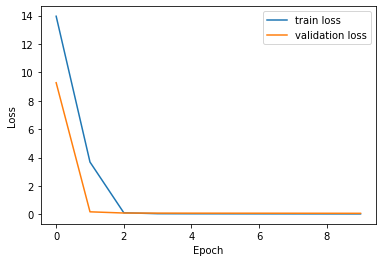

In [34]:
# plot the loss
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [35]:
# save the model
model.save('S:\Conestoga\Learning_Subject\Foundation_of_ML\Project/1amazon_model.h5')

In [43]:
# check the model
model = keras.models.load_model('S:\Conestoga\Learning_Subject\Foundation_of_ML\Project/1amazon_model.h5')

# make function to recommend the products
def recommend_products(
    product_name,
    about_product,
    review_title,
    review_content,
    category1,
    category2,
    rating,
    rating_count,
    discounted_price,
    actual_price,
):
    # Tokenize the text data
    product_name_sequence = tokenizer.texts_to_sequences([product_name])
    product_name_sequence = pad_sequences(product_name_sequence, maxlen=max_text_len)
    about_product_sequence = tokenizer.texts_to_sequences([about_product])
    about_product_sequence = pad_sequences(about_product_sequence, maxlen=max_text_len)
    review_title_sequence = tokenizer.texts_to_sequences([review_title])
    review_title_sequence = pad_sequences(review_title_sequence, maxlen=max_text_len)
    review_content_sequence = tokenizer.texts_to_sequences([review_content])
    review_content_sequence = pad_sequences(review_content_sequence, maxlen=max_text_len)

    # Encode the categorical features
    category1_encoded = label_encoder_category1.transform([category1])
    category2_encoded = label_encoder_category2.transform([category2])

    # Normalize the numerical features
    numerical_features = scaler.transform(
        [[rating, rating_count, discounted_price, actual_price]]
    )

    # Predict the rating
    prediction = model.predict(
        {
            "product_name": product_name_sequence,
            "about_product": about_product_sequence,
            "review_title": review_title_sequence,
            "review_content": review_content_sequence,
            "category1": category1_encoded,
            "category2": category2_encoded,
            "numerical": numerical_features,
        }
    )

    user_id = 123  # Replace with the actual user ID

    user_item_ratings = list(zip([user_id] * len(predicted_ratings.squeeze()), predicted_ratings.squeeze()))
    user_item_ratings.sort(key=lambda x: x[1], reverse=True)

    top_5_recommendations = [item_id for item_id, _ in user_item_ratings[:5]]

    print(f"Top 5 Recommendations for User {user_id}: {top_5_recommendations}")
    # # Get the top 10 recommendations
    # top_10_recommendations = main_feature4m_df.loc[
    #     main_feature4m_df["rating"] > prediction[0][0], ["product_name", "rating"]
    # ].head(10)

    return top_10_recommendations, prediction

# recommend the products
recommend_products(
    product_name="BERGNER Argent TriPly 24 cm Frypan/Steel Pan, Scratch Resistant, for Spice Tempering/Seasoning, Stay Cool Long Handle, Mirror Finish, Easy to Clean, Induction and Gas Stove Ready, 5-Year Warranty",
    about_product="Less Oil Use & Low Flame Cooking : The triply material heats evenly and reduces hot spots, preventing food from burning or sticking. This allows you to use less oil while still achieving a non-stick effect for healthier cooking",
    review_title= " Great quality. Satisfactory product.",
    review_content= "A great quality frying pan. Bought for Rs. 2088. You will find cheaper options, but know that they will be a compromise in quality for sure. A great all-purpose utensil to have in the kitchen, worth the investment in the long term. Whatever you could cook on a non-stick pan, you can cook it better on a stainless steel frying pan(if and when used properly). COOKING: There will be a slight learning curve to cooking on this if you've never used a stainless steel pan before and have only cooked on non-stick. The most important thing to keep in mind when cooking on SS is heat. Make sure you heat the pan properly with a little bit of oil and you'll never have stickage. Fail to do so and it WILL stick. Other than that do your own research, learn how to use it properly and you'll have fun cooking like never before. CLEANING: 1. Never use a steel scrub on this pan. 2. If used properly, there won't be anything stuck to the pan, but if there is, it should come out relatively easily with dish soap and a sponge or scotch bright plastic scrub. 3. With usage it will develop brown stains, especially on the inner side of walls. That is normal. That's just stains left by burnt oil. To remove those use baking powder, water, a little heat, and scrub it off. Then wash with normal dish soap. 4. Also, with time it might develop a multicolored stain on the inner flat surface (similar to how oil appears rainbow coloured on rainwater). Again, don't worry. That's just the chromium in the steel reacting with heat and air to form what's called a heat tint. It's easily removed with a splash of vinegar and equal amount of water, and your pan will be good as new. In conclusion, if used properly, and taken good care of, this pan will stay with you for a long time, and is an essential tool to have in any enthusiast's kitchen.",
    category1= "HomeandKitchen",
    category2= "KitchenandHome Appliances",
    rating= 4.4,
    rating_count= 559,
    discounted_price= 2434,
    actual_price= 3045,
)

c:\Users\Om C. Patel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(                                         product_name  rating
 0   wayona nylon braided usb to lightning fast cha...     4.2
 3   boat deuce usb 300 2 in 1 typec  micro usb str...     4.2
 4   portronics konnect l 12m fast charging 3a 8 pi...     4.2
 6   boat micro usb 55 tanglefree sturdy micro usb ...     4.1
 7                 mi usb typec cable smartphone black     4.3
 8   tplink usb wifi adapter for pctlwn725n n150 wi...     4.2
 10  portronics konnect l por1081 fast charging 3a ...     4.3
 11  boat rugged v3 extra tough unbreakable braided...     4.2
 12  amazonbasics flexible premium hdmi cable black...     4.4
 13  portronics konnect cl 20w por1067 typec to 8 p...     4.2,
 array([[4.0938663, 4.1246037, 4.141036 , 4.126191 , 4.1107707]],
       dtype=float32))

## 2 Collaborative Filtering Based Recommender System

In [37]:
# Now, lets make popularity based recommendation system. We will recommend the products based on the popularity of the product. The product which has the highest rating will be recommended.
# Popularity based recommendation system
# Get the top 10 most popular products

top_10_popular_products = main_feature4m_df.sort_values(
    by="rating", ascending=False
).head(10)

top_10_popular_products

,user_id,product_id,product_name,about_product,rating,rating_count,discounted_price,actual_price,review_title,review_content,category_1,category_2,category_1_encoded,category_2_encoded
775,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...",B09ZHCJDP1,amazon basics wireless mouse 24 ghz connectio...,reliable wireless connection up to 10madvanced...,5.0,23.0,499.0,1000.0,very responsive and stylish mousesimply awesom...,i really like this wireless mouse it has becam...,ComputersandAccessories,AccessoriesandPeripherals,1,1
174,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...",B0BP7XLX48,syncwire ltg to usb cable for fast charging co...,this sturdy and durable cable made of tpe and ...,5.0,5.0,399.0,1999.0,goodsuperb qualitygood products nice oneworki...,product is good in quality working good with m...,ComputersandAccessories,AccessoriesandPeripherals,1,1
1201,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...",B0BQ3K23Y1,oratech coffee frother electric milk frother e...,make delicious milk foam creamer for your drin...,4.8,28.0,279.0,499.0,oratech best coffee frothergreatmy review abou...,overall i love this oratech coffee frother and...,HomeandKitchen,KitchenandHome Appliances,5,17
1299,"AGXJAYXZKJ6NCPSLX57MXJLQ3F6Q,AEQYSJWBP6DN2IV2L...",B0B53DS4TF,instant pot air fryer vortex 2qt touch control...,voltage 230 volts instant vortex air fryer 19 ...,4.8,3964.0,4995.0,20049.0,loved itgood productgood productits easy to us...,i have used multiple air fryers but this one i...,HomeandKitchen,KitchenandHome Appliances,5,17
1145,"AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NM...",B0BR4F878Q,swiffer instant electric water heater faucet t...,quick electric hot water tap heating tube high...,4.8,53803.0,1439.0,1999.0,best productits expansive but it works well up...,must buy best fabulous product i recommend thi...,HomeandKitchen,"Heating, CoolingandAir Quality",5,11
1223,"AGMHHTX7GPWHZAUTEYQOFEEDFMDQ,AEJJGJQCIEPL3ZBNU...",B0BM4KTNL1,figment handheld milk frother rechargeable 3sp...,rechargeable multifunction milk frotherthe mil...,4.7,1729.0,699.0,1599.0,nice productnot as effective as claimed just a...,value for moneynot as effective as claimed jus...,HomeandKitchen,KitchenandHome Appliances,5,17
1226,"AG6AS2KLLZMPPPEKF5RIJXTMA4FA,AEW6BC4YLRYKI5OZG...",B0BLC2BYPX,zuvexa usb rechargeable electric foam maker h...,the food taste stainless steel whisking head i...,4.7,54.0,499.0,1299.0,little kitchen helperan amazing productvery go...,the first time i tried it send the eggs and th...,HomeandKitchen,KitchenandHome Appliances,5,17
459,"AGQIXFPHABUZ2WPETGRYDB7VSMXA,AECPF7WFMUQ3TR7YT...",B0B23LW7NV,spigen ez fit tempered glass screen protector ...,compatibility glass screen protector compatib...,4.7,7779.0,999.0,2899.0,easy to installbest screen guard and the easie...,it is easy to install at home the kit has all ...,Electronics,MobilesandAccessories,2,20
249,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...",B09WN3SRC7,sony bravia 164 cm 65 inches 4k ultra hd smart...,resolution 4k ultra hd 3840 x 2160 refresh ra...,4.7,5935.0,77990.0,139900.0,product installation was excellent but delive...,the delivery people were not careful with the ...,Electronics,"Home Theater, TVandVideo",2,15
1275,"AFZ2YKWX4KR7MWSA6UOMEGGHT32A,AEP6WZ7AR6XDQSBFS...",B0BM9H2NY9,multifunctional 2 in 1 electric egg boiling st...,egg frying pan,4.7,2300.0,699.0,1599.0,amazing value for moneyvery easy to use2 in 1g...,worth buying for eggetariansworking great so f...,HomeandKitchen,KitchenandHome Appliances,5,17
